# Avaliaçao de Modelos - Métricas de Classificação - Parte 1

In [1]:
import numpy as np
from sklearn import metrics

In [2]:
y_true = ['dog', 'dog', 'dog', 'dog', 'dog', 'dog',
    'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',      
     'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
     'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit']

y_pred = ['dog', 'dog', 'dog', 'rabbit', 'cat', 'cat',
     'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 
     'dog', 'dog', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
     'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit']

## Matriz de Confusão

### Representando y_true e y_pred através de uma matriz

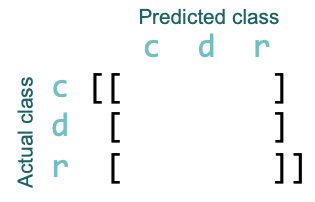

In [3]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=['cat', 'dog', 'rabbit'])
print(cm)

[[ 5  3  0]
 [ 2  3  1]
 [ 0  2 11]]


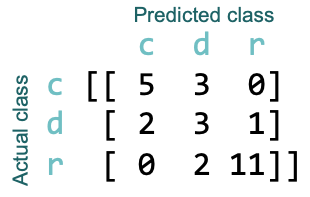

In [3]:
19/27

0.7037037037037037

## Métrica Acurácia (Accuracy)

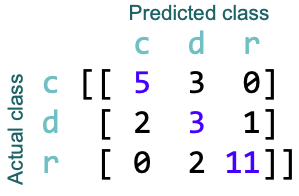

In [4]:
metrics.accuracy_score(y_true, y_pred)

0.7037037037037037

### Calcule a Acurácia usando apenas o numpy

In [5]:
accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
accuracy

0.7037037037037037

## Precision x Recall

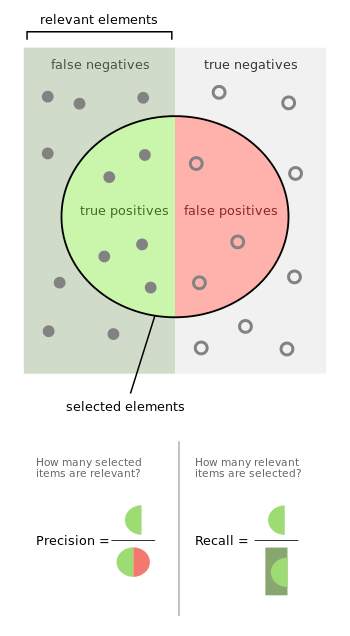

## Métrica Precisão

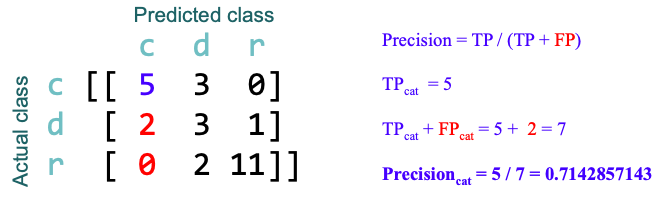

### Calcule o Recall usando o scikit

In [6]:
metrics.precision_score(y_true, y_pred, labels=['cat', 'dog', 'rabbit'], average=None)

array([0.71428571, 0.375     , 0.91666667])

### Calcule a Precisão da classe cat usando apenas o numpy

In [7]:
precision_cat = cm[0,0] / np.sum(cm[:,0])
precision_cat

0.7142857142857143

## Métrica Revocação (Recall)

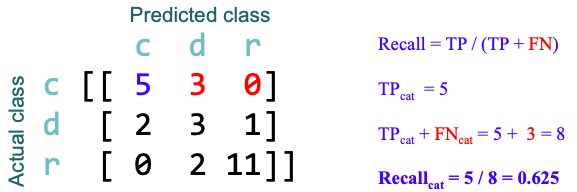

### Calcule o Recall usando o scikit

In [8]:
metrics.recall_score(y_true, y_pred, labels=['cat', 'dog', 'rabbit'], average=None)

array([0.625     , 0.5       , 0.84615385])

### Calcule o Recall da classe cat usando apenas o numpy

In [9]:
recall_cat = cm[0,0] / np.sum(cm[0,:])
print(recall_cat)

0.625


## Métrica F-Measure ou F-Score

É a média harmônica entre precisão e recall.

### Média Harmônica
Tende (em comparação com a média aritmética) a mitigar o impacto de grandes valores atípicos e agravar o impacto das pequenas.

A média aritmética é muitas vezes utilizada erroneamente em locais que exigem a média harmônica.

Um exemplo é o cálculo da velocidade média em um percurso de ida e volta em uma mesma via, em que a ida é percorrida a 60 km/h e a volta a 40 km/h a média aritmética de 50 está incorreta. 

A velocidade média no percurso total é a média harmônica de 40 e 60, ou seja 48km/h. Isto se deve ao fato de que, como os dois trechos tem o mesmo comprimento, quanto menor for a velocidade, mais do tempo total é despendido àquela velocidade e, então, ela tem um peso maior na composição da velocidade média.

### Média Harmônica de n valores

$$ H = \frac{n}{ \frac{1}{x_1} + \frac{1}{x_2} + \cdots + \frac{1}{x_n}  } $$

### Média Harmônica de 2 valores

$$ H = \frac{2}{ \frac{1}{x_1} + \frac{1}{x_2}  } = \frac{ 2 \cdot x_1 \cdot x_2 }{x_1 + x_2} $$

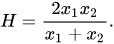

### $F_1$-Measure ou $F_1$-Score

$$ F_1 = \frac{2 \cdot precision \cdot recall}{precision + recall} $$

### $F_{\beta}$-Measure ou $F_{\beta}$-Score

É possível generalizar a métrica F-Score para dar mais peso a Precisão ou Recall da seguinte forma:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall} $$

$F_{0.5}$ dá mais peso ao Recall, ou seja, dá ênfase aos falsos negativos, que aos falsos positivos.

$$ F_{0.5} = \frac{1.5 \cdot precision \cdot recall}{0.25 \cdot precision + recall} $$


$F_1$ dá o mesmo peso a Precision e Recall, ou seja, falsos negativos e falsos positivos possuem a mesma importância.

$$ F_1 = \frac{2 \cdot precision \cdot recall}{precision + recall} $$

$F_2$ dá mais peso a Precisão, ou seja, dá ênfase aos falsos positivos, que aos falsos negativos.

$$ F_2 = \frac{5 \cdot precision \cdot recall}{4 \cdot precision + recall} $$

In [5]:
metrics.f1_score(y_true, y_pred, labels=['cat', 'dog', 'rabbit'], 
                 average=None)

array([0.66666667, 0.42857143, 0.88      ])

## Classification Report

In [6]:
(0.71 + 0.38 + 0.92)/3

0.6699999999999999

In [7]:
(0.71*8 + 0.38*6 + 0.92*13)/27

0.7377777777777779

In [10]:
print(metrics.classification_report(y_true, y_pred, labels=['cat', 'dog', 'rabbit']))

              precision    recall  f1-score   support

         cat       0.71      0.62      0.67         8
         dog       0.38      0.50      0.43         6
      rabbit       0.92      0.85      0.88        13

    accuracy                           0.70        27
   macro avg       0.67      0.66      0.66        27
weighted avg       0.74      0.70      0.72        27



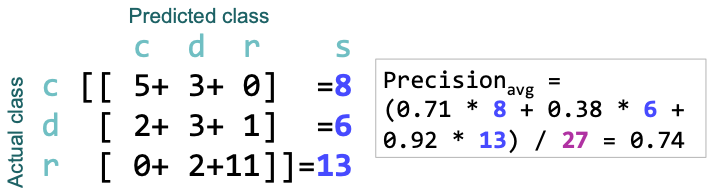